# Parametric Statistical Significance Tests

Parametric statistical tests assume that a data sample was drawn from a specific population
distribution. They often refer to statistical tests that assume the Gaussian distribution. Because
it is so common for data to fit this distribution.

### A typical question we may have about two or more samples of data is whether they have the same distribution -  that is a data distribution with the same mean and standard deviation?

In [7]:
import numpy as np
np.random.seed(1)

# generate two sets of univariate observations
MEAN_1 = 50
MEAN_2 = 51
STD = 5
SAMPLE_SIZE=100

data1 = np.random.normal(MEAN_1, STD, size=SAMPLE_SIZE)
data2 = np.random.normal(MEAN_2, STD, size=SAMPLE_SIZE)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))


data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


#  Student’s t-Test
The Student’s t-test is a statistical hypothesis test that :

two independent data samples with the sme size known to have a Gaussian distribution, have the SAME Gaussian distribution.


* Fail to Reject H0: No difference between the sample means.

* Reject H0: Some difference between the sample means.

The assumption or null hypothesis of the test is that the means of two populations are equal.
A rejection of this hypothesis indicates that there is sufficient evidence that the means of the
populations are different, and in turn that the distributions are not equal.
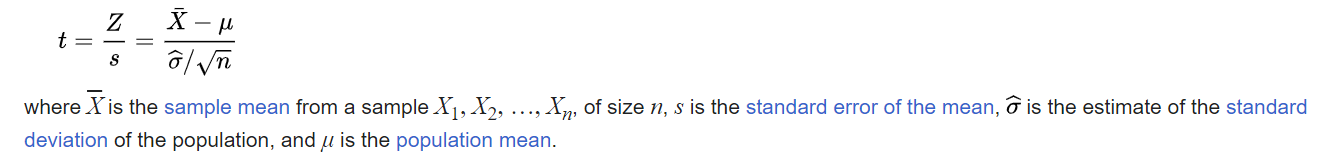

In [8]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.262, p=0.025
Different distributions (reject H0)


## For different variance in samples:

In [10]:
# generate two sets of univariate observations
MEAN_1 = 50
MEAN_2 = 51
STD1 = 5
STD2 = 7

SAMPLE_SIZE=100

new_data1 = np.random.normal(MEAN_1, STD1, size=SAMPLE_SIZE)
new_data2 = np.random.normal(MEAN_2, STD2, size=SAMPLE_SIZE)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(new_data1), np.std(new_data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(new_data2), np.std(new_data2)))

stat, p = ttest_ind(data1, data2, equal_var=False)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

data1: mean=50.322 stdv=5.178
data2: mean=51.879 stdv=7.298
Statistics=-2.262, p=0.025
Different distributions (reject H0)


# Paired Student’s t-Test

We may wish to compare the means between two dependent data samples. These data samples are repeated or dependent and are referred to as paired samples. We must use a modified version of the test that corrects for the fact that the
data samples are dependent, called the paired Student’s t-test.

there is enough evidence that the sample means are different.

* Fail to Reject H0: Paired sample distributions are equal.
* Reject H0: Paired sample distributions are not equal.


In [16]:
from scipy.stats import ttest_rel

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=nan, p=0.025
Different distributions (reject H0)


# Analysis of Variance Test

There are sometimes situations where we may have multiple independent data samples. We can
perform the Student’s t-test pairwise on each combination of the data samples to get an idea of
which samples have different means. This can be onerous if we are only interested in whether
all samples have the same distribution or not. To answer this question, we can use the analysis
of variance test, or ANOVA for short. ANOVA is a statistical test that assumes that the mean
across 2 or more groups are equal. If the evidence suggests that this is not the case, the null
hypothesis is rejected and at least one data sample has a different distribution.

* Fail to Reject H0: All sample distributions are equal.

* Reject H0: One or more sample distributions are not equal.

The test requires that

1. data samples are a Gaussian distribution 

2. samples are independent

3. data samples have the same standard deviation

In [22]:
from scipy.stats import f_oneway

np.random.seed(1)
# generate three independent samples
data1 = np.random.normal(50, 5, size=100)
data2 = np.random.normal(50, 5, size=100)
data3 = np.random.normal(52, 5, size=100)

# compare samples
stat, p = f_oneway(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=3.655, p=0.027
Different distributions (reject H0)


# Repeated Measures ANOVA Test

ANOVA for dependent samples.


* Fail to Reject H0: All paired sample distributions are equal.
13.8. Extensions 110
* Reject H0: One or more paired sample distributions are not equal.

NO scipy implementation

## Resources used

Statistical Methods for Machine Learning. Discover How to Transform Data into Knowledge with Python (Brownlee) 1,4 ed (2019)

https://en.wikipedia.org/wiki/Student%27s_t-test